In [172]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt      
%matplotlib inline

In [173]:
df=pd.read_csv("Airbnb_DataFrame_After_Cleaning.csv")
df

,Name,City,Rating,Price,Reviews,Location,Cleanliness,Communication,Value for Money,Accuracy,...,TV,Wifi,Free street parking,Privet parking,Refrigerator,Air conditioning,Kitchen,Pets allowd,Dedicated workspace,Security cameras
0,"J&J's BnB Lovely, BR/Bath w/ Private Entrance!",Medford,4.93,13371,15,4.9,5.0,4.8,4.8,4.9,...,0,0,0,1,0,0,0,0,1,0
1,"Room for residents at nearby colleges, hospitals",Medford,4.97,4556,30,4.8,5.0,5.0,4.9,5.0,...,0,1,0,1,0,0,1,0,1,0
2,"Cozy bedroom in Suffolk, LI",Medford,5.00,3728,5,4.4,5.0,5.0,5.0,5.0,...,0,1,1,0,0,1,0,0,0,0
3,Waterfront DuneRd WHB Village Private Ocean Ac...,Medford,5.00,264043,3,5.0,5.0,5.0,5.0,5.0,...,0,1,0,0,0,0,1,0,1,0
4,Bellport Beach Estates Private Cottage with Pool,Medford,4.85,48149,41,5.0,4.7,5.0,4.8,5.0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Art room “,Manhattan,4.67,4816,12,4.2,4.2,4.9,4.7,4.5,...,1,1,0,0,0,0,1,0,0,1
1931,room 3,Manhattan,4.85,6640,13,4.9,4.8,4.9,4.8,4.9,...,0,0,0,1,0,0,1,0,1,0
1932,Luxurious Queen Bedroom,Manhattan,4.62,7221,26,4.6,4.7,4.7,4.5,4.5,...,1,0,0,0,0,0,0,0,0,0
1933,Beautiful room with a view to meditate.,Manhattan,4.29,7719,7,3.7,4.4,4.7,4.1,4.6,...,0,1,0,0,0,0,1,0,1,0


#### Before we start fitting the data into models, it is useful to explore the data to understand its distribution:

Text(0.5, 1.0, "Number of Apartments in New-york's Citys")

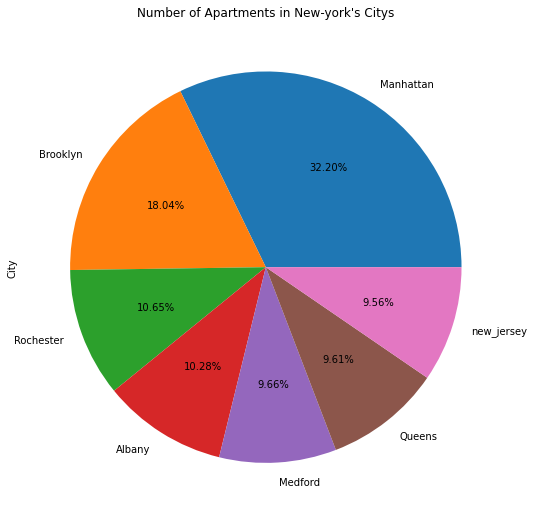

In [174]:
df['City'].value_counts().plot(kind='pie', figsize=(9, 9),autopct="%.2f%%")
plt.title("Number of Apartments in New-york's Citys")

## Now we want to see the split of "Rating" column

C:\Users\97254\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

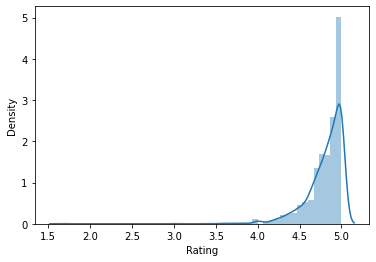

In [175]:
sns.distplot(df['Rating'])

## Distributuon of Rating's apratments in each citys

C:\Users\97254\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='Rating'>

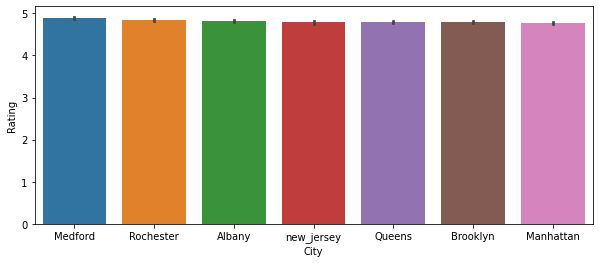

In [176]:
fig=plt.figure(figsize=(10,4))
sns.barplot('City','Rating',data=df)

## Distributuon of Price's apratments in each citys

C:\Users\97254\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='Price'>

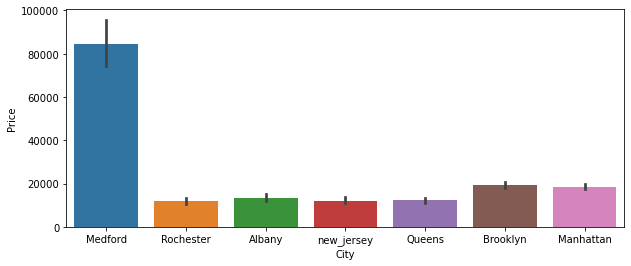

In [177]:
fig=plt.figure(figsize=(10,4))
sns.barplot('City','Price',data=df)

## Compering the "Rating" column to importent columns

C:\Users\97254\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\97254\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\97254\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Price'>

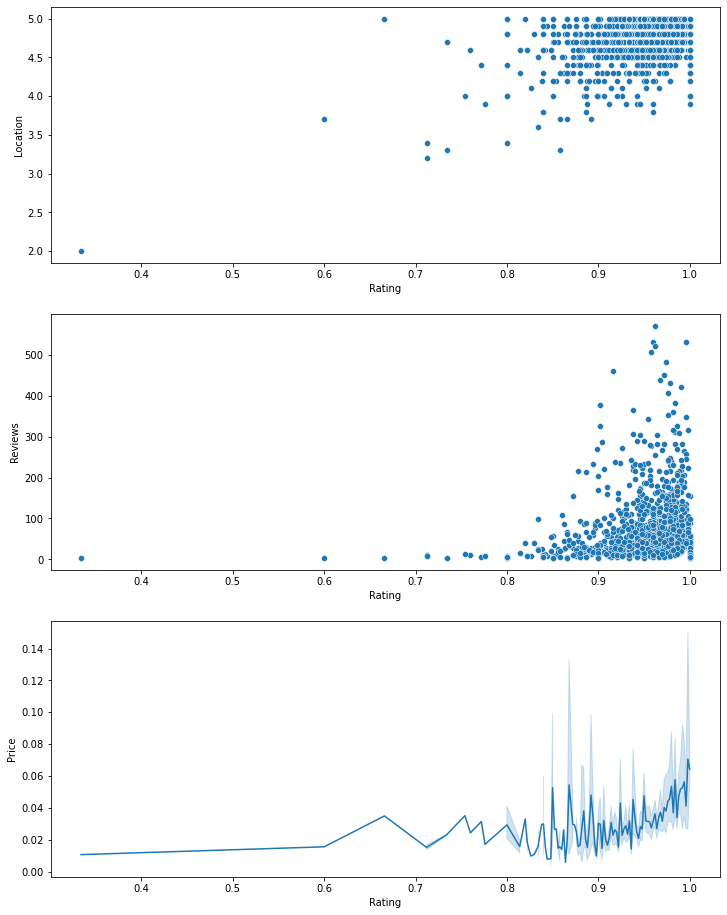

In [178]:
#normalize the "Rating" and the Price column
# from stack overflow
df_n=df.copy()
df_n["Rating"] = df_n["Rating"] / df_n["Rating"].max()
df_n["Price"] = df_n["Price"] / df_n["Price"].max()


fig=plt.figure(figsize=(12,16))
#must be 3 int digits
ax1=fig.add_subplot(311)
sns.scatterplot('Rating','Location',data=df_n,ax=ax1)
ax2=fig.add_subplot(312)
sns.scatterplot('Rating','Reviews',data=df_n,ax=ax2)
ax3=fig.add_subplot(313)
sns.lineplot('Rating','Price',data=df_n,ax=ax3)

## Distributuon of Pets allowed column in each Citys

<Figure size 720x720 with 0 Axes>

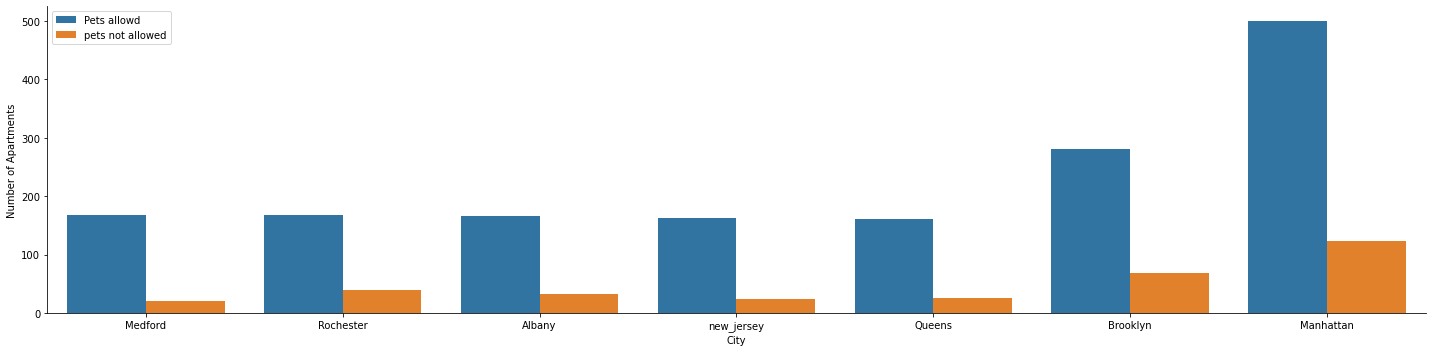

In [179]:

plt.figure(figsize=(10,10))
g = sns.catplot(
    x='City', 
    data = df_n,
    kind='count', 
    hue='Pets allowd',
    height=5, 
    aspect=4,
    legend=False,
    ).set_axis_labels('City', 'Number of Apartments')
g.ax.legend(labels=['Pets allowd','pets not allowed'])

## distributuon of Price's apratments in each citys with diffrent number of Guests

C:\Users\97254\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Guests', ylabel='Price'>

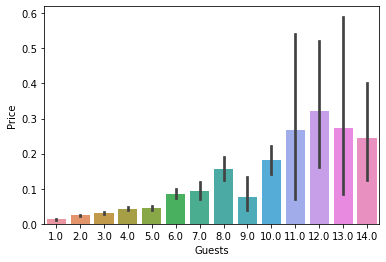

In [180]:
sns.barplot('Guests',"Price",data=df_n)